<a href="https://colab.research.google.com/github/SriSharanya-617/ensemblelearning/blob/main/teleco_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns

In [26]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


In [28]:
from sklearn.preprocessing import LabelEncoder

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop customer ID
df.drop('customerID', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


/tmp/ipython-input-3204579007.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("Recall (Churn):", recall_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.7849538679914834
Recall (Churn): 0.553475935828877
Confusion Matrix:
 [[899 136]
 [167 207]]


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, f1_score

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Accuracy: 0.8112136266855926
Precision: 0.6888111888111889
Recall: 0.5267379679144385
F1 Score: 0.5969696969696969
Confusion Matrix:
 [[946  89]
 [177 197]]


In [33]:
import pandas as pd

importance = pd.Series(
    gb.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10)


,0
Contract,0.400917
tenure,0.144140
MonthlyCharges,0.139828
TotalCharges,0.080051
OnlineSecurity,0.078129
TechSupport,0.059704
PaymentMethod,0.022876
PaperlessBilling,0.019984
InternetService,0.015806
MultipleLines,0.010210


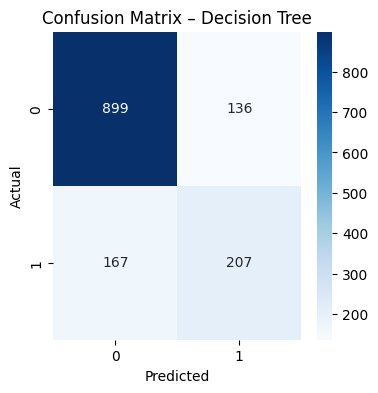

In [36]:
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)

py.figure(figsize=(4,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
py.title("Confusion Matrix – Decision Tree")
py.xlabel("Predicted")
py.ylabel("Actual")
py.show()

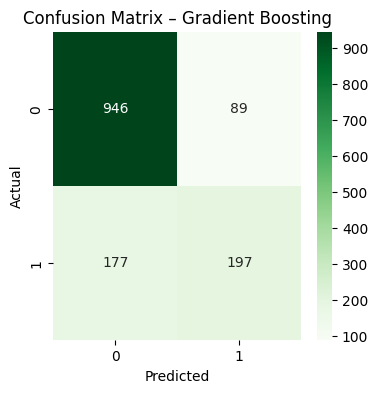

In [39]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

py.figure(figsize=(4,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens')
py.title("Confusion Matrix – Gradient Boosting")
py.xlabel("Predicted")
py.ylabel("Actual")
py.show()

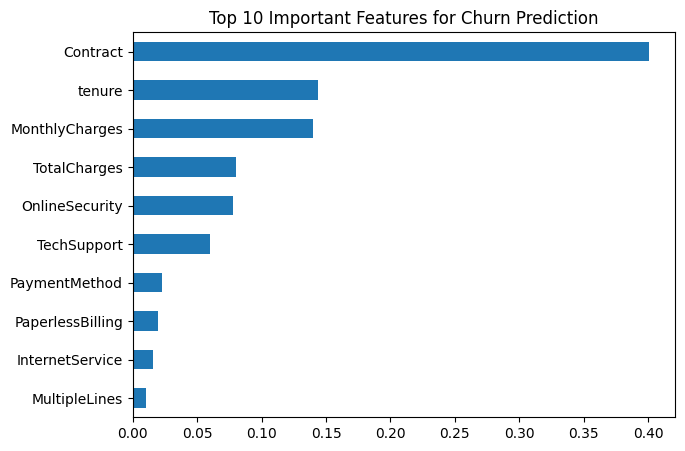

In [40]:
importance = pd.Series(
    gb.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

py.figure(figsize=(7,5))
importance.head(10).plot(kind='barh')
py.title("Top 10 Important Features for Churn Prediction")
py.gca().invert_yaxis()
py.show()